# WEB SCRAPING BOOKS PROJECT

This simple project was to practice web scraping and visualizing the data using a practice scraping website.

Link for the  website: http://books.toscrape.com/


### What This Notebook Shows:
1. Review and use of web scraping
2. Use of Pandas, NumPy, Matplotlib and Seaborn


In [1]:
# Import libraries:
import urllib3
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the webpage to scrape:
prefix = 'http://books.toscrape.com/'

In [3]:
# Define a function to request and parse a HTML web page:
# This function will be important later on
def getAndParseURL(url):
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')
    return(soup)

soup = getAndParseURL(prefix) 

In [4]:
# Find all <a> tags (hyperlinks) within the main page:
book_links = soup.find_all('a')

# Go through all <a> tags and get the links associated with on the main page
links = []
for a in book_links:
    links.append(prefix + a["href"])

# Convert all links on the main page into dataframe, drop duplicates, reset index
links_df = pd.DataFrame(links, columns = ['Links'])
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
links_df = links_df.drop_duplicates(subset = 'Links', keep = 'first')
links_df = links_df.reset_index(drop=True)
links_df.head()

,Links
0,http://books.toscrape.com/index.html
1,http://books.toscrape.com/catalogue/category/books_1/index.html
2,http://books.toscrape.com/catalogue/category/books/travel_2/index.html
3,http://books.toscrape.com/catalogue/category/books/mystery_3/index.html
4,http://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html


In [5]:
# find distinct URL in href attribute:
soup.find("article", class_ = "product_pod").div.a.get('href')

'catalogue/a-light-in-the-attic_1000/index.html'

In [6]:
# Web scraping all the books on the main page:
main_page_products_urls = [x.div.a.get('href') for x in soup.findAll("article", class_ = "product_pod")]

print(str(len(main_page_products_urls)) + " products URLs scraped on the main page:")
main_page_products_urls

20 products URLs scraped on the main page:


['catalogue/a-light-in-the-attic_1000/index.html',
 'catalogue/tipping-the-velvet_999/index.html',
 'catalogue/soumission_998/index.html',
 'catalogue/sharp-objects_997/index.html',
 'catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'catalogue/the-requiem-red_995/index.html',
 'catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'catalogue/the-black-maria_991/index.html',
 'catalogue/starving-hearts-triangular-trade-trilogy-1_990/index.html',
 'catalogue/shakespeares-sonnets_989/index.html',
 'catalogue/set-me-free_988/index.html',
 'catalogue/scott-pilgrims-precious-little-life-scott-pilgrim-1_987/index.html',
 'catalogue/rip-it-up-and-start-again_986/index.html',
 'catalogue/our-band-could-be-your-life-scene

In [7]:
# Web scraping all the categories on the main page:
categories_urls = [prefix + x.get('href') for x in soup.find_all("a", href= re.compile("catalogue/category/books"))]
categories_urls = categories_urls[1:] # Remove first as it corresponds to all books

print(str(len(categories_urls)) + " categories URLs scraped (show the first five):")
categories_urls[:5]

50 categories URLs scraped (show the first five):


['http://books.toscrape.com/catalogue/category/books/travel_2/index.html',
 'http://books.toscrape.com/catalogue/category/books/mystery_3/index.html',
 'http://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html',
 'http://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html',
 'http://books.toscrape.com/catalogue/category/books/classics_6/index.html']

In [8]:
# Web scraping all the books from the website:

# Store all the results into a list
pages_urls = [prefix]

# Use the function defined previously at [3]
soup = getAndParseURL(pages_urls[0])

# When we get 2 matches, it means that the webpage contains a 'previous' and a 'next' button
# When there is only one button, it means that we are on the first or last pages
# The while loop stops on the last page

while len(soup.findAll("a", href=re.compile("page"))) == 2 or len(pages_urls) == 1:
    
    # Get the new url by adding the fetched URL to the base URL and removing the .html part of the base URL)
    new_url = "/".join(pages_urls[-1].split("/")[:-1]) + "/" + soup.findAll("a", href = re.compile("page"))[-1].get("href")
    
    # add the URL to the list
    pages_urls.append(new_url)
    
    # parse the next page
    soup = getAndParseURL(new_url)
    

print(str(len(pages_urls)) + " scraped URLs (show the first five):")
pages_urls[:5]

50 scraped URLs (show the first five):


['http://books.toscrape.com/',
 'http://books.toscrape.com/catalogue/page-2.html',
 'http://books.toscrape.com/catalogue/page-3.html',
 'http://books.toscrape.com/catalogue/page-4.html',
 'http://books.toscrape.com/catalogue/page-5.html']

In [9]:
# Print the status of the last page:
result = requests.get("http://books.toscrape.com/catalogue/page-50.html")
print("status code for page 50: " + str(result.status_code))

status code for page 50: 200


In [10]:
# Print the status of a page that doesn't exist:
result = requests.get("http://books.toscrape.com/catalogue/page-51.html")
print("status code for page 51: " + str(result.status_code))

status code for page 51: 404


In [11]:
# Define another function to request and parse all books HTML web page:
def getBooksURLs(url):
    soup = getAndParseURL(url)
    # Remove the index.html part of the base url before returning the results
    return(["/".join(url.split("/")[:-1]) + "/" + x.div.a.get('href') for x in soup.findAll("article", class_ = "product_pod")])

In [12]:
# Get all 1000 books URLs:
# Use the function in [11]
booksURLs = []
for page in pages_urls:
    booksURLs.extend(getBooksURLs(page))
    
print(str(len(booksURLs)) + " scraped URLs. We show 10 below:")
booksURLs[:10]

1000 scraped URLs. We show 10 below:


['http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'http://books.toscrape.com/catalogue/soumission_998/index.html',
 'http://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'http://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
 'http://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'http://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'http://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'http://books.toscrape.com/catalogue/the-black-maria_991/index.html']

In [13]:
# Scrape data from each book URL (Takes time as there are 1000 books) and then convert into dataframe:

names = []
prices = []
nb_in_stock = []
img_urls = []
categories = []
ratings = []

for url in booksURLs:
    soup = getAndParseURL(url)
    # Product name
    names.append(soup.find("div", class_ = re.compile("product_main")).h1.text)
    # Product price
    prices.append(soup.find("p", class_ = "price_color").text[2:]) # get rid of the pound sign
    # Number of available products
    nb_in_stock.append(re.sub("[^0-9]", "", soup.find("p", class_ = "instock availability").text)) # get rid of non numerical characters
    # Image url
    img_urls.append(url.replace("index.html", "") + soup.find("img").get("src"))
    # Product category
    categories.append(soup.find("a", href = re.compile("../category/books/")).get("href").split("/")[3])
    # Ratings
    ratings.append(soup.find("p", class_ = re.compile("star-rating")).get("class")[1])
    
# Convert into pandas dataframe
all_books_df = pd.DataFrame({'Book Name': names, 'Selling Price': prices, 'Number in Stock': nb_in_stock, "URL of Image": img_urls, "Genre": categories, "Rating": ratings})
all_books_df.head()

,Book Name,Selling Price,Number in Stock,URL of Image,Genre,Rating
0,A Light in the Attic,51.77,22,http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/../../media/cache/fe/72/fe72f0532301ec28892ae79a629a293c.jpg,poetry_23,Three
1,Tipping the Velvet,53.74,20,http://books.toscrape.com/catalogue/tipping-the-velvet_999/../../media/cache/08/e9/08e94f3731d7d6b760dfbfbc02ca5c62.jpg,historical-fiction_4,One
2,Soumission,50.10,20,http://books.toscrape.com/catalogue/soumission_998/../../media/cache/ee/cf/eecfe998905e455df12064dba399c075.jpg,fiction_10,One
3,Sharp Objects,47.82,20,http://books.toscrape.com/catalogue/sharp-objects_997/../../media/cache/c0/59/c05972805aa7201171b8fc71a5b00292.jpg,mystery_3,Four
4,Sapiens: A Brief History of Humankind,54.23,20,http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/../../media/cache/ce/5f/ce5f052c65cc963cf4422be096e915c9.jpg,history_32,Five


In [14]:
# Edit Genre column and data types for Selling Price, Number in Stock, Rating:
genre_split = all_books_df['genre_split'] = all_books_df.Genre.str.split("_")
all_books_df['Genre'] = all_books_df.genre_split.str.get(0)
all_books_df = all_books_df.drop(columns = ['genre_split'])

# Replace Rating (/5) objects into integers
all_books_df['Rating'].replace('One', 1, inplace=True)
all_books_df['Rating'].replace('Two', 2, inplace=True)
all_books_df['Rating'].replace('Three', 3, inplace=True)
all_books_df['Rating'].replace('Four', 4, inplace=True)
all_books_df['Rating'].replace('Five', 5, inplace=True)

# Change data types
all_books_df = all_books_df.astype({"Selling Price": float, "Number in Stock": int, "Rating": int})

# Reset Index
all_books_df = all_books_df.reset_index(drop=True)

# Show top 10 rows
all_books_df.head(10)

,Book Name,Selling Price,Number in Stock,URL of Image,Genre,Rating
0,A Light in the Attic,51.77,22,http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/../../media/cache/fe/72/fe72f0532301ec28892ae79a629a293c.jpg,poetry,3
1,Tipping the Velvet,53.74,20,http://books.toscrape.com/catalogue/tipping-the-velvet_999/../../media/cache/08/e9/08e94f3731d7d6b760dfbfbc02ca5c62.jpg,historical-fiction,1
2,Soumission,50.10,20,http://books.toscrape.com/catalogue/soumission_998/../../media/cache/ee/cf/eecfe998905e455df12064dba399c075.jpg,fiction,1
3,Sharp Objects,47.82,20,http://books.toscrape.com/catalogue/sharp-objects_997/../../media/cache/c0/59/c05972805aa7201171b8fc71a5b00292.jpg,mystery,4
4,Sapiens: A Brief History of Humankind,54.23,20,http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/../../media/cache/ce/5f/ce5f052c65cc963cf4422be096e915c9.jpg,history,5
5,The Requiem Red,22.65,19,http://books.toscrape.com/catalogue/the-requiem-red_995/../../media/cache/6b/07/6b07b77236b7c80f42bd90bf325e69f6.jpg,young-adult,1
6,The Dirty Little Secrets of Getting Your Dream Job,33.34,19,http://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/../../media/cache/e1/1b/e11bea016d0ae1d7e2dd46fb3cb870b7.jpg,business,4
7,"The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull",17.93,19,http://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/../../media/cache/97/36/9736132a43b8e6e3989932218ef309ed.jpg,default,3
8,The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,22.60,19,http://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/../../media/cache/d1/2d/d12d26739b5369a6b5b3024e4d08f907.jpg,default,4
9,The Black Maria,52.15,19,http://books.toscrape.com/catalogue/the-black-maria_991/../../media/cache/d1/7a/d17a3e313e52e1be5651719e4fba1d16.jpg,poetry,1


In [20]:
# Save data to CSV:
all_books_df.to_csv('BookToScrape.csv')

### Data Visualization:

Having webscraped our data, we can now perform multiple visualizations using Matplotlib and Seaborn to make the project more entertaining. Few ideas as follows:

- The number of books per genre + distribution comparison
- The average price per genre + distribution comparison
- The average rating per genre + distribution comparison
- The highest rated books overall
- The lowest rated books overall

We showcase below a few examples:

Text(0.5, 1.0, 'Average Selling Price per Genre')

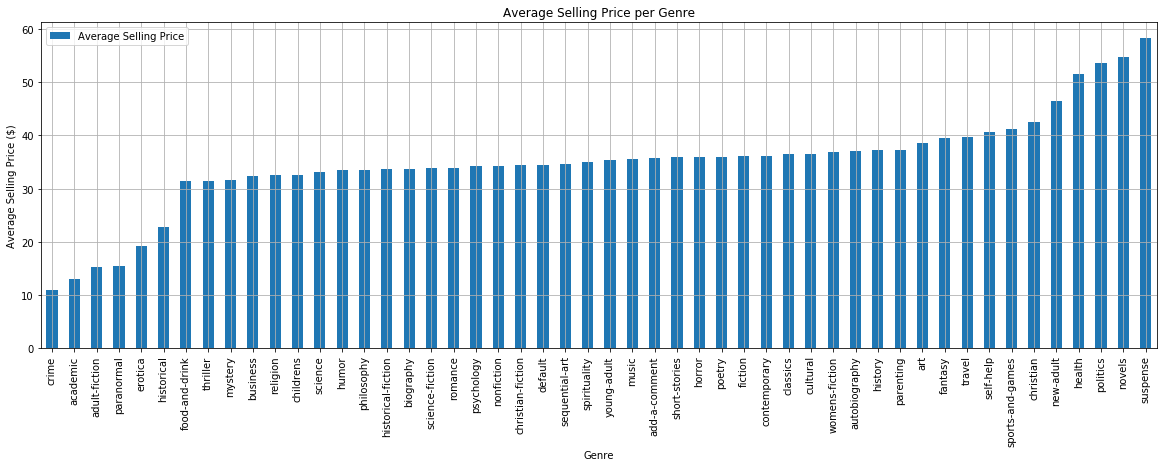

In [16]:
# Group each Genre and take the average selling price of each genre:
genre_df = all_books_df.groupby('Genre', as_index = True)['Selling Price'].mean()

# Convert Series back to Dataframe and sort by ascending values:
genre_df = genre_df.to_frame(name = 'Average Selling Price').reset_index()
genre_df.sort_values(by = ['Average Selling Price'], ascending = True, inplace = True)

# Plot Bar Chart to show distribution:
genre_df.plot(kind = 'bar', x = 'Genre', y = 'Average Selling Price', grid = 'on', figsize = (20, 6), rot = 90)
plt.xlabel('Genre')
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price per Genre')

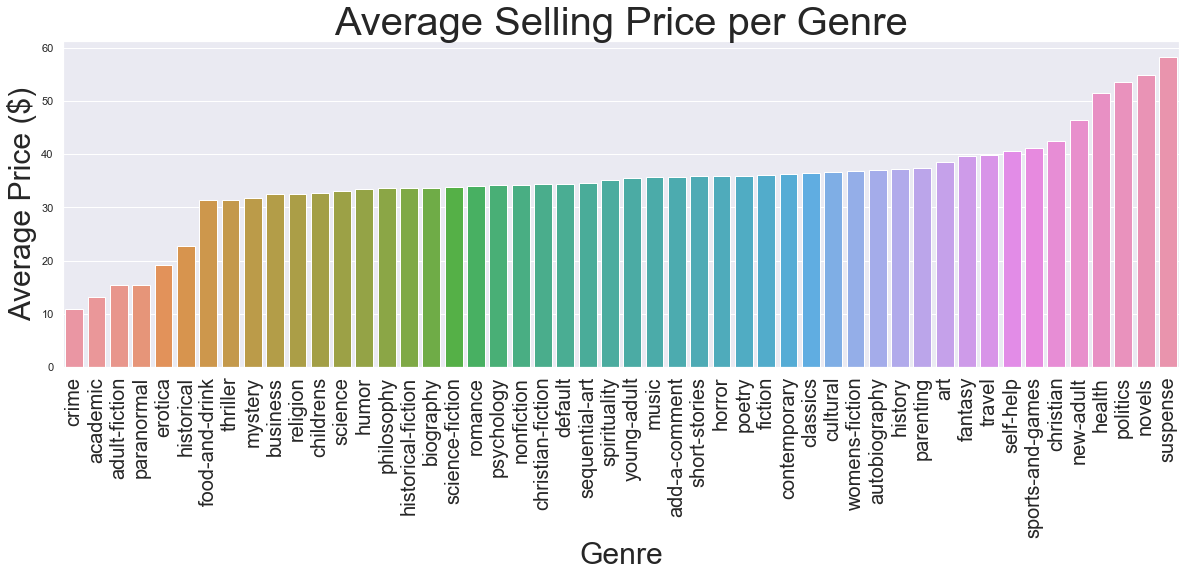

In [21]:
# We can also use Seaborn for a prettier plot of Average Selling Price per Genre:
ave_price_per_genre_plot = sns.barplot(
    data= genre_df,
    x= 'Genre',
    y= 'Average Selling Price')
ave_price_per_genre_plot.set_title('Average Selling Price per Genre', fontsize = 40)
ave_price_per_genre_plot.set_xticklabels(ave_price_per_genre_plot.get_xticklabels(),rotation=90, fontsize = 20)
ave_price_per_genre_plot.set_xlabel("Genre",fontsize = 30)
ave_price_per_genre_plot.set_ylabel("Average Price ($)",fontsize = 30)
sns.set(rc = {'figure.figsize':(20, 6)})

Here we can easily observe that the most expensive genre based on the average selling price is the 'Suspense' genre while the cheapest is 'Crime'.

In [18]:
# Group each Genre and take the average ratings of each genre:
ratings_df = all_books_df.groupby('Genre', as_index = True)['Rating'].mean()

# Convert Series back to Dataframe and sort by ascending values:
ratings_df = ratings_df.to_frame(name = 'Average Rating').reset_index()
ratings_df.sort_values(by = ['Average Rating'], ascending = True, inplace = True)

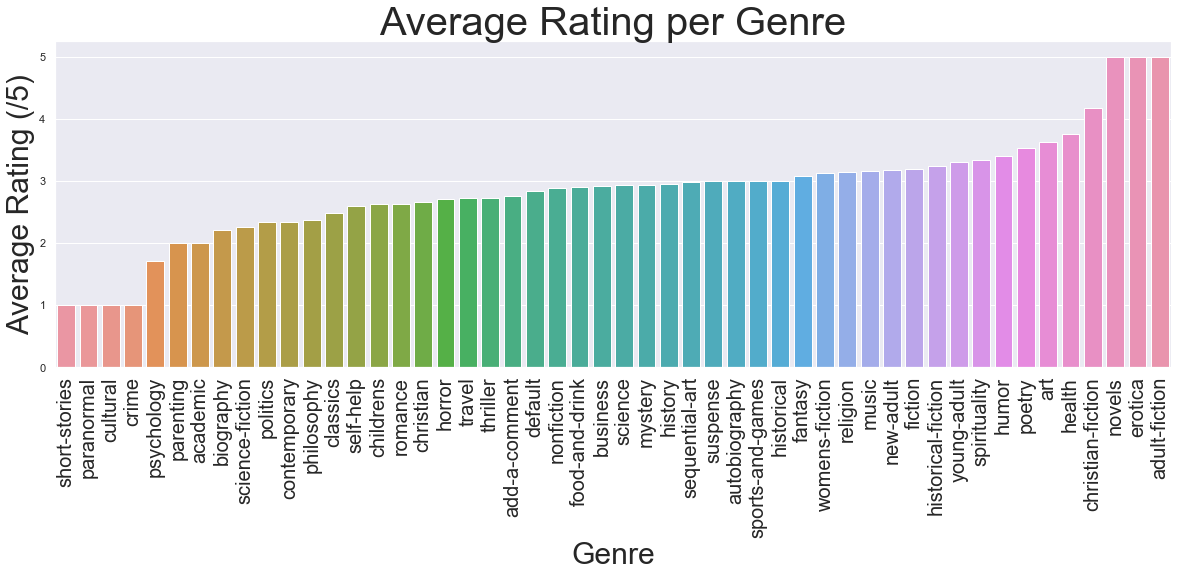

In [19]:
# Use Seaborn to plot Average Rating per Genre:
ave_rating_per_genre_plot = sns.barplot(
    data= ratings_df,
    x= 'Genre',
    y= 'Average Rating')
ave_rating_per_genre_plot.set_title('Average Rating per Genre', fontsize = 40)
ave_rating_per_genre_plot.set_xticklabels(ave_rating_per_genre_plot.get_xticklabels(),rotation= 90, fontsize = 20)
ave_rating_per_genre_plot.set_xlabel("Genre",fontsize = 30)
ave_rating_per_genre_plot.set_ylabel("Average Rating (/5)",fontsize = 30)
sns.set(rc = {'figure.figsize':(20, 6)})

Here we can notice that 'Novels', 'Erotica' and 'Adult-fiction' genres are the top rated genres while 'Short-stories', 'Paranormal', 'Cultural' and 'Crime' are the worst rated ones. 

More could be visualized to perceive interesting correlations such as for the 'Crime' genre (as its average selling price is low, so is its average ratings). 'Adult-fiction' and 'Erotica' have low average selling prices, yet their ratings are quite good showing an inverse relationship. Nevertheless, these statistics don't mean much as the website uses fake data.

### Conclusion:

Web scraping is useful to gather data for different projects, in this case related to books. Gathering the data and then analyzing/visualizing it using Matplotlib & Seaborn is a great way to share results and make it easily understandable to others from a non-technical & business aspect. This project was a concise and useful practice for my other project involving NBA Analytics. An important aspect of web scraping efficiently is to understand the structure of the website being web scraped __(and check if they allow you to web scrape in the first place)__. Another thing to note is that the code has to be maintained in order to stay useful as websites change their structures. From my knowledge, using Selenium is quite useful to cope with these problems and automate the process.